# Exploratory Data Analysis

- Database contains top 10 videos in 5 regions (India, USA, Brazil, Indonesia and Mexico) for 19 days
- date time in UTC 

In [114]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv('data_for_eda.csv')

df.head()

,id,region_code,publish_date,channel_id,channel_name,title,description,category_id,duration,caption,views,likes,comment_count
0,XhW3i2f54BQ,IN,2025-02-24T05:37:32Z,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,Watch #HIT3Teaser : Sarkaar's Laathi on Wall P...,1,PT1M45S,True,16695651,323858,6688
1,W8x6Dwyj0-A,IN,2025-02-22T11:30:08Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,YOU CAN FEEL THE HEAT! PRESENTING THE OFFICIAL...,10,PT2M58S,False,25780803,1588648,115750
2,dbWfo4NAx8M,IN,2025-02-23T17:12:10Z,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not Disappointed at All | #PAKVIND | Shoa...,I am Not Disappointed at All | #PAKVIND\n\n#Sh...,17,PT3M53S,False,2064436,83781,5386
3,DQnZhK6Y27g,IN,2025-02-23T06:11:52Z,UCebC4x5l2-PQxg46Ucv9CsA,Crazy XYZ,Crazy Secret Room Making Challenges Part-3 | इ...,Probo Link: https://probo-in.onelink.me/1kre/C...,28,PT29M42S,False,4442627,300654,47471
4,UTaWdNZkGcM,IN,2025-02-23T17:21:39Z,UC9D7QzaNDP11e4jI4ygU5Xg,NewsBook,IND vs PAK: India की Pakistan पर Virat जीत ! R...,#indvspak #viratkohli #shreyasiyer #shubmangil...,17,PT11M48S,False,1374247,59617,3526


In [116]:
pd.set_option("display.float_format", "{:,.2f}".format)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             950 non-null    object
 1   region_code    950 non-null    object
 2   publish_date   950 non-null    object
 3   channel_id     950 non-null    object
 4   channel_name   950 non-null    object
 5   title          950 non-null    object
 6   description    913 non-null    object
 7   category_id    950 non-null    int64 
 8   duration       950 non-null    object
 9   caption        950 non-null    bool  
 10  views          950 non-null    int64 
 11  likes          950 non-null    int64 
 12  comment_count  950 non-null    int64 
dtypes: bool(1), int64(4), object(8)
memory usage: 90.1+ KB


In [118]:
df.describe()

,category_id,views,likes,comment_count
count,950.00,950.00,950.00,950.00
mean,18.20,"2,704,345.89","114,595.63","7,517.76"
std,6.20,"5,162,960.37","234,055.51","16,819.39"
min,1.00,"20,125.00",0.00,0.00
25%,17.00,"376,058.50","11,999.50",740.25
50%,20.00,"897,611.50","34,546.00","2,126.50"
75%,24.00,"2,628,984.50","106,944.00","6,154.00"
max,28.00,"42,787,778.00","2,328,540.00","153,045.00"


In [119]:
df.nunique()

id               694
region_code        5
publish_date     688
channel_id       518
channel_name     517
title            695
description      645
category_id       14
duration         561
caption            2
views            898
likes            908
comment_count    836
dtype: int64

- out of 950 videos, 694 are unique

## 1. Feature Engineering

In [120]:
df = df.rename(columns={'publish_date' : 'publish_date_time'})

df.head(5)

,id,region_code,publish_date_time,channel_id,channel_name,title,description,category_id,duration,caption,views,likes,comment_count
0,XhW3i2f54BQ,IN,2025-02-24T05:37:32Z,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,Watch #HIT3Teaser : Sarkaar's Laathi on Wall P...,1,PT1M45S,True,16695651,323858,6688
1,W8x6Dwyj0-A,IN,2025-02-22T11:30:08Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,YOU CAN FEEL THE HEAT! PRESENTING THE OFFICIAL...,10,PT2M58S,False,25780803,1588648,115750
2,dbWfo4NAx8M,IN,2025-02-23T17:12:10Z,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not Disappointed at All | #PAKVIND | Shoa...,I am Not Disappointed at All | #PAKVIND\n\n#Sh...,17,PT3M53S,False,2064436,83781,5386
3,DQnZhK6Y27g,IN,2025-02-23T06:11:52Z,UCebC4x5l2-PQxg46Ucv9CsA,Crazy XYZ,Crazy Secret Room Making Challenges Part-3 | इ...,Probo Link: https://probo-in.onelink.me/1kre/C...,28,PT29M42S,False,4442627,300654,47471
4,UTaWdNZkGcM,IN,2025-02-23T17:21:39Z,UC9D7QzaNDP11e4jI4ygU5Xg,NewsBook,IND vs PAK: India की Pakistan पर Virat जीत ! R...,#indvspak #viratkohli #shreyasiyer #shubmangil...,17,PT11M48S,False,1374247,59617,3526


In [121]:
# splitting date and time into two columns
df[['publish_date', 'publish_time']] = df['publish_date_time'].str.split('T', expand=True)
df['publish_time'] = df['publish_time'].str.rstrip('Z')


In [122]:
# convert to appropriate data types
df['publish_date_time'] = pd.to_datetime(df['publish_date_time'], utc=True, errors='coerce') 

df['duration_in_min'] = pd.to_timedelta(df['duration'], errors='coerce').dt.total_seconds() #duration in minutes
df['duration_in_min'] = (df['duration_in_min']/60.00).round(2) #duration in minutes

df.dtypes

id                                object
region_code                       object
publish_date_time    datetime64[ns, UTC]
channel_id                        object
channel_name                      object
title                             object
description                       object
category_id                        int64
duration                          object
caption                             bool
views                              int64
likes                              int64
comment_count                      int64
publish_date                      object
publish_time                      object
duration_in_min                  float64
dtype: object

In [123]:
# adding some useful columns 
df['views_per_minute'] = (df.views/df.duration_in_min).round(2)
df['likes_per_minute'] = (df.likes/df.duration_in_min).round(2)

df['likes_per_view'] = (df.likes/df.views).round(2)
df['comments_per_view'] = (df.comment_count/df.views).round(2)
df.head(3)

,id,region_code,publish_date_time,channel_id,channel_name,title,description,category_id,duration,caption,views,likes,comment_count,publish_date,publish_time,duration_in_min,views_per_minute,likes_per_minute,likes_per_view,comments_per_view
0,XhW3i2f54BQ,IN,2025-02-24 05:37:32+00:00,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,Watch #HIT3Teaser : Sarkaar's Laathi on Wall P...,1,PT1M45S,True,16695651,323858,6688,2025-02-24,05:37:32,1.75,"9,540,372.00","185,061.71",0.02,0.00
1,W8x6Dwyj0-A,IN,2025-02-22 11:30:08+00:00,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,YOU CAN FEEL THE HEAT! PRESENTING THE OFFICIAL...,10,PT2M58S,False,25780803,1588648,115750,2025-02-22,11:30:08,2.97,"8,680,405.05","534,898.32",0.06,0.00
2,dbWfo4NAx8M,IN,2025-02-23 17:12:10+00:00,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not Disappointed at All | #PAKVIND | Shoa...,I am Not Disappointed at All | #PAKVIND\n\n#Sh...,17,PT3M53S,False,2064436,83781,5386,2025-02-23,17:12:10,3.88,"532,071.13","21,593.04",0.04,0.00


In [124]:
""""Getting categories for all regions using Youtube Data API"""

# from mypackage import get_youtube_object

# youtube = get_youtube_object()

# categories = {}
# for region in ['IN', 'US', 'BR', 'ID', 'MX']:
#     request = youtube.videoCategories().list(
#             part="snippet",
#             regionCode='IN'
#         )
#     response = request.execute()
#     tmp_dict = {}
#     for i in range(len(response['items'])):
#         tmp_dict[response['items'][i]['id']] = response['items'][i]['snippet']['title']
#     categories[region] = tmp_dict

# print(categories)


'"Getting categories for all regions using Youtube Data API'

In [125]:
# categories = {'IN': {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}, 
#               'US': {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}, 
#               'BR': {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}, 
#               'ID': {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}, 
#               'MX': {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}}

- since there is no difference between categories of these 5 regions we can simply use one dict

In [126]:
categories = {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}

In [127]:
df['category'] = df['category_id'].apply(lambda x: categories[str(x)] if str(x) in categories.keys() else 'NaN')

df.head()

,id,region_code,publish_date_time,channel_id,channel_name,title,description,category_id,duration,caption,...,likes,comment_count,publish_date,publish_time,duration_in_min,views_per_minute,likes_per_minute,likes_per_view,comments_per_view,category
0,XhW3i2f54BQ,IN,2025-02-24 05:37:32+00:00,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,Watch #HIT3Teaser : Sarkaar's Laathi on Wall P...,1,PT1M45S,True,...,323858,6688,2025-02-24,05:37:32,1.75,"9,540,372.00","185,061.71",0.02,0.00,Film & Animation
1,W8x6Dwyj0-A,IN,2025-02-22 11:30:08+00:00,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,YOU CAN FEEL THE HEAT! PRESENTING THE OFFICIAL...,10,PT2M58S,False,...,1588648,115750,2025-02-22,11:30:08,2.97,"8,680,405.05","534,898.32",0.06,0.00,Music
2,dbWfo4NAx8M,IN,2025-02-23 17:12:10+00:00,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not Disappointed at All | #PAKVIND | Shoa...,I am Not Disappointed at All | #PAKVIND\n\n#Sh...,17,PT3M53S,False,...,83781,5386,2025-02-23,17:12:10,3.88,"532,071.13","21,593.04",0.04,0.00,Sports
3,DQnZhK6Y27g,IN,2025-02-23 06:11:52+00:00,UCebC4x5l2-PQxg46Ucv9CsA,Crazy XYZ,Crazy Secret Room Making Challenges Part-3 | इ...,Probo Link: https://probo-in.onelink.me/1kre/C...,28,PT29M42S,False,...,300654,47471,2025-02-23,06:11:52,29.70,"149,583.40","10,123.03",0.07,0.01,Science & Technology
4,UTaWdNZkGcM,IN,2025-02-23 17:21:39+00:00,UC9D7QzaNDP11e4jI4ygU5Xg,NewsBook,IND vs PAK: India की Pakistan पर Virat जीत ! R...,#indvspak #viratkohli #shreyasiyer #shubmangil...,17,PT11M48S,False,...,59617,3526,2025-02-23,17:21:39,11.80,"116,461.61","5,052.29",0.04,0.00,Sports


In [128]:
# checking for missing categories
df[df['category'] == 'Nan']

,id,region_code,publish_date_time,channel_id,channel_name,title,description,category_id,duration,caption,...,likes,comment_count,publish_date,publish_time,duration_in_min,views_per_minute,likes_per_minute,likes_per_view,comments_per_view,category


## 2. EDA

In [129]:
df.head(3)

,id,region_code,publish_date_time,channel_id,channel_name,title,description,category_id,duration,caption,...,likes,comment_count,publish_date,publish_time,duration_in_min,views_per_minute,likes_per_minute,likes_per_view,comments_per_view,category
0,XhW3i2f54BQ,IN,2025-02-24 05:37:32+00:00,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,Watch #HIT3Teaser : Sarkaar's Laathi on Wall P...,1,PT1M45S,True,...,323858,6688,2025-02-24,05:37:32,1.75,"9,540,372.00","185,061.71",0.02,0.00,Film & Animation
1,W8x6Dwyj0-A,IN,2025-02-22 11:30:08+00:00,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,YOU CAN FEEL THE HEAT! PRESENTING THE OFFICIAL...,10,PT2M58S,False,...,1588648,115750,2025-02-22,11:30:08,2.97,"8,680,405.05","534,898.32",0.06,0.00,Music
2,dbWfo4NAx8M,IN,2025-02-23 17:12:10+00:00,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not Disappointed at All | #PAKVIND | Shoa...,I am Not Disappointed at All | #PAKVIND\n\n#Sh...,17,PT3M53S,False,...,83781,5386,2025-02-23,17:12:10,3.88,"532,071.13","21,593.04",0.04,0.00,Sports


In [130]:
df.dtypes

id                                object
region_code                       object
publish_date_time    datetime64[ns, UTC]
channel_id                        object
channel_name                      object
title                             object
description                       object
category_id                        int64
duration                          object
caption                             bool
views                              int64
likes                              int64
comment_count                      int64
publish_date                      object
publish_time                      object
duration_in_min                  float64
views_per_minute                 float64
likes_per_minute                 float64
likes_per_view                   float64
comments_per_view                float64
category                          object
dtype: object

In [131]:
# prolly shd make a publish_time, publish_date interval

### 2.1 Univariate Analysis

In [132]:
categorical = ['title', 'channel_name', 'category', 'caption', 'publish_date', 'publish_time']
numerical = ['duration_in_min', 'views', 'likes', 'comment_count']
datetime = 'publish_date_time'

#### 2.1.1 Categorical Columns

In [133]:
def categorical_univariate(df, col, hue):
    if df[col].nunique() < 30: # make plot only if unique values dont go beyond 50
        print('Column: ' + col)
        _, axes = plt.subplots(1, 2, figsize=(12, 6))
        sns.countplot(data=df, y=col, ax=axes[0])
        axes[0].set_title(f'Bar plot of {col}', fontsize=12)

        sns.countplot(data=df, y=col, hue=hue, ax=axes[1])
        axes[1].set_title(f'Bar plot of {col} with {hue}', fontsize=12)

        plt.tight_layout()
        plt.show()
        
    print(df[col].value_counts())
    print('-------------------------------------' + '\n')


In [134]:
# for col in categorical:
#     categorical_univariate(df, col, 'region_code')

##### Insights

- _Sports_ is the most popular category
    - it is followed closely by _Entertainment_ and _Music_  

- Most of the _Sports_ videos are popular in _Brazil_
- Most of the _Entertainment_ videos are popular in _India_
- Most of the _Music_ videos are popular in _Mexico_
- Most of the _Comedy_ videos are popular in _India_

- Out of top 5 videos, 3 are K-pop music videos

In [135]:
df[['title']].value_counts().head(10)

title                                                                                         
j-hope ‘Sweet Dreams (feat. Miguel)’ Official MV                                                  9
JENNIE - like JENNIE (Official Video)                                                             9
Race Highlights | 2025 Australian Grand Prix                                                      6
JENNIE & Dua Lipa - Handlebars (Official Video)                                                   6
G-DRAGON - TOO BAD (feat. Anderson .Paak) (Official Video)                                        6
HIGHLIGHTS | FC BARCELONA 4 vs 4 ATLETICO MADRID | COPA DEL REY 24/25 (WITH COMMENTARY)           6
Qualifying Highlights | 2025 Australian Grand Prix                                                5
Selena Gomez, benny blanco - Sunset Blvd (Official Video)                                         5
HIT 3 Teaser : Sarkaar's Laathi | Nani | Sailesh Kolanu | Srinidhi Shetty | in Cinemas May 1st    5
MANIA

In [136]:
df['channel_name'].value_counts().head(10)

channel_name
JennieRubyJaneVEVO    15
HYBE LABELS           14
Canal GOAT            14
FORMULA 1             11
Colors Cineplex       11
Sony SAB               9
OfficialGDRAGON        9
CazéTV                 9
FC Barcelona           8
TNT Sports Brasil      8
Name: count, dtype: int64

#### 2.1.2 Numerical Columns

In [137]:
def numerical_univariate(df, col, hue):
    nbins = None
    range = df[col].max() - df[col].min()
    if range > 500 or abs(df[col].skew()) > 2:
        nbins = 50 if range < 1000 else 100
    print(col)

# histograms with and without hue
    _, axes = plt.subplots(1, 2, figsize=(13, 5))

    sns.histplot(data=df, x=col, kde=True, bins=nbins, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}', fontsize=12)

    sns.histplot(data=df, x=col, kde=True, bins=nbins, hue=df[hue], palette='bright', ax=axes[1])
    axes[1].set_title(f'Distribution of {col} with {hue}', fontsize=12)

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
# boxplots with and without hue
    _, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.boxplot(data=df, x=col, ax=axes[0])
    axes[0].set_title(f'Boxplot of {col}', fontsize=12)

    sns.boxplot(data=df, x=col, hue=hue, ax=axes[1])
    axes[1].set_title(f'Boxplot of {col} with {hue}', fontsize=12)
    
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    print('----------------------------------- \n')

In [138]:
# for col in numerical:
#     numerical_univariate(df, col, 'region_code')

##### Some Insights from graphs

For overall data:
- all the numerical columns have mean larger than median
- but the difference is especially significant for views and likes
- this implies mean in this data set should not be used blindly for analysis

Group by region_code:
- Brazil has largest duration of videos
- Brazil for duration follows the same trend until reaching 150 - 350 min range where it increases again
    - most popular videos remain short videos except some in 150 - 350 min range
- India has most views and likes
    - but for comments it is much more even for all regions
- Brazil has lowest comment_count

#### 2.1.3 Outlier Analysis

- all the numeric columns are heavily skewed to the right
- some outlier analysis can be done to reduce this

In [139]:
df.loc[(df['region_code'] == 'BR') & ((df['duration_in_min'] >= 140) & (df['duration_in_min'] <= 350)), ['title', 'channel_name', 'category', 'publish_date', 'duration_in_min', 'views', 'likes']]

,title,channel_name,category,publish_date,duration_in_min,views,likes
20,JOGO COMPLETO: CORINTHIANS X GUARANI | SUPER R...,CazéTV,Sports,2025-02-24,261.83,5221183,123359
21,VASCO X BOTAFOGO | CAMPEONATO CARIOCA | AO VIV...,Canal GOAT,Sports,2025-02-24,265.02,1457763,35139
24,AO VIVO E COM IMAGENS: REMO X PAYSANDU | 7ª RO...,Canal do Benja,Sports,2025-02-23,210.22,628041,25634
71,KINGS LEAGUE BRAZIL - APRESENTAÇÃO + DRAFT DAY,Kings League Brasil,Sports,2025-02-25,233.80,236277,12552
77,VASCO X BOTAFOGO | CAMPEONATO CARIOCA | AO VIV...,Canal GOAT,Sports,2025-02-24,265.02,1463916,34215
270,JOGO COMPLETO: SÃO BERNARDO X PALMEIRAS | QUAR...,CazéTV,Sports,2025-03-02,217.85,6959423,138562
271,COM IMAGENS - VASCO X FLAMENGO- CARIOCA 2025 -...,Vasco TV,Sports,2025-03-01,240.68,2157856,71936
272,BAHIA 1 X 2 JACUIPENSE | PARTIDA COMPLETA | BA...,TVE Bahia,Sports,2025-03-01,152.20,492293,12624
274,ATLÉTICO 0 X 4 VITÓRIA | PARTIDA COMPLETA | BA...,TVE Bahia,Sports,2025-03-01,151.25,410802,7690
320,SÃO PAULO VENCE COM CALLERI CRAVANDO E PEGA O ...,TNT Sports Brasil,Sports,2025-03-04,242.13,1843151,11268


- the outliers in duration of videos in Brazil is due to live sports matches

In [140]:
# checking mean and median
for col in numerical:
    print(f"Mean of {col} is {df[col].mean()}")
    print(f"Median of {col} is {df[col].median()}")
    print()

Mean of duration_in_min is 27.6636
Median of duration_in_min is 10.52

Mean of views is 2704345.8905263157
Median of views is 897611.5

Mean of likes is 114595.6252631579
Median of likes is 34546.0

Mean of comment_count is 7517.758947368421
Median of comment_count is 2126.5



In [141]:
for col in numerical:
    print(col)
    print(f"Max: {df[col].max()}")
    print(f"Min: {df[col].min()}")
    print()

duration_in_min
Max: 714.9
Min: 0.28

views
Max: 42787778
Min: 20125

likes
Max: 2328540
Min: 0

comment_count
Max: 153045
Min: 0



In [142]:
def remove_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [143]:
for col in numerical:
    df_clean = remove_outlier(df, col)

In [144]:
df_clean.describe()

,category_id,views,likes,comment_count,duration_in_min,views_per_minute,likes_per_minute,likes_per_view,comments_per_view
count,847.00,847.00,847.00,847.00,847.00,847.00,847.00,847.00,847.00
mean,18.69,"1,769,449.21","56,604.46","2,929.96",30.05,"458,859.57","13,644.09",0.05,0.00
std,5.92,"2,890,873.84","74,345.33","3,133.86",64.61,"1,660,625.62","42,012.43",0.04,0.01
min,1.00,"20,125.00",0.00,0.00,0.28,756.51,0.00,0.00,0.00
25%,17.00,"328,926.50","10,599.50",635.50,4.04,"20,644.64",617.72,0.02,0.00
50%,20.00,"758,873.00","28,436.00","1,645.00",11.80,"60,525.73","2,117.89",0.03,0.00
75%,24.00,"1,909,524.50","75,198.00","4,340.50",24.12,"218,230.99","9,288.38",0.06,0.00
max,28.00,"19,653,593.00","572,937.00","14,180.00",714.90,"17,631,717.02","533,188.57",0.38,0.05


duration_in_min


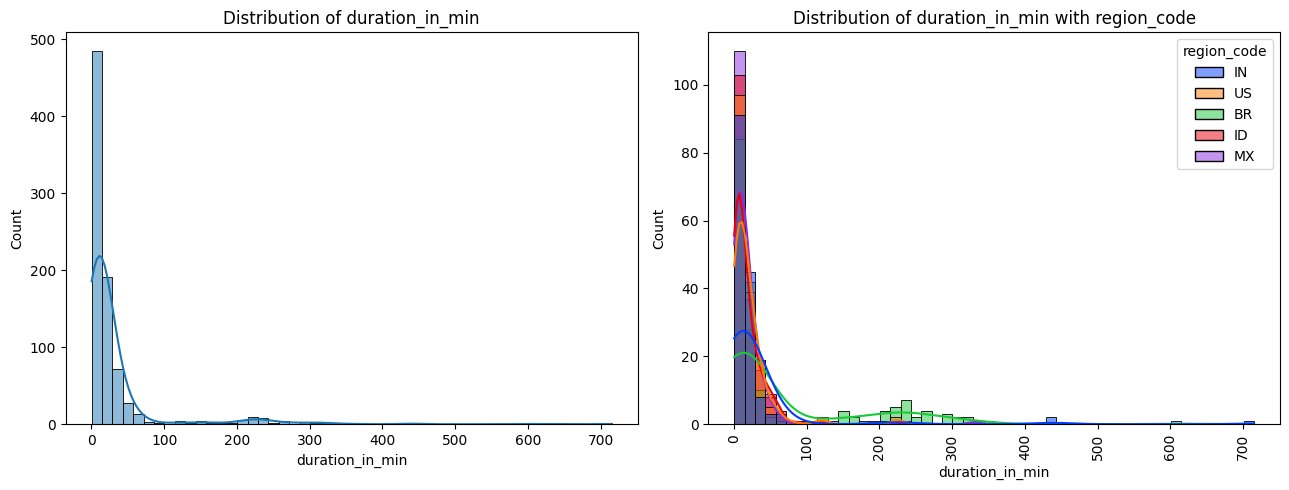

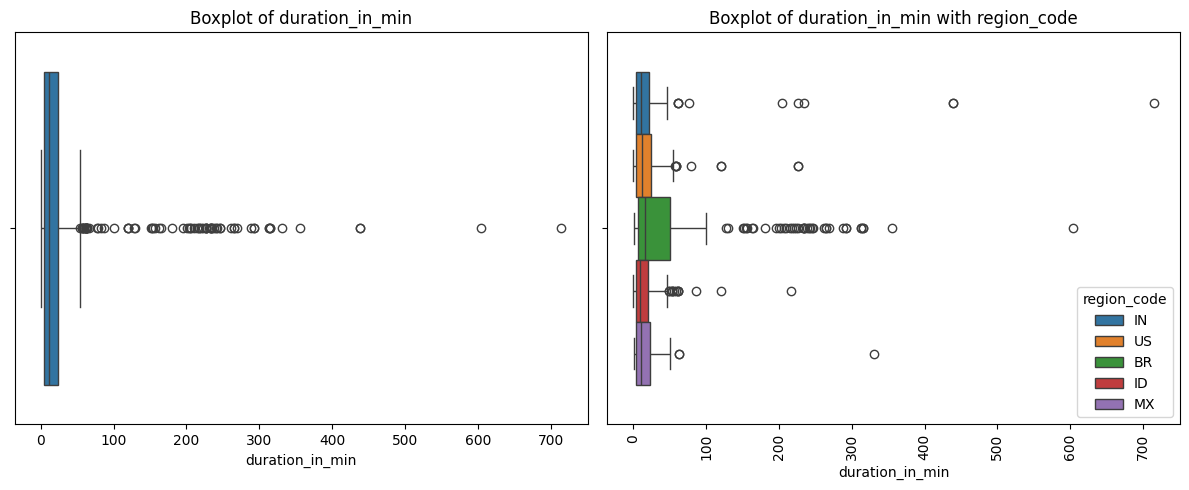

----------------------------------- 

views


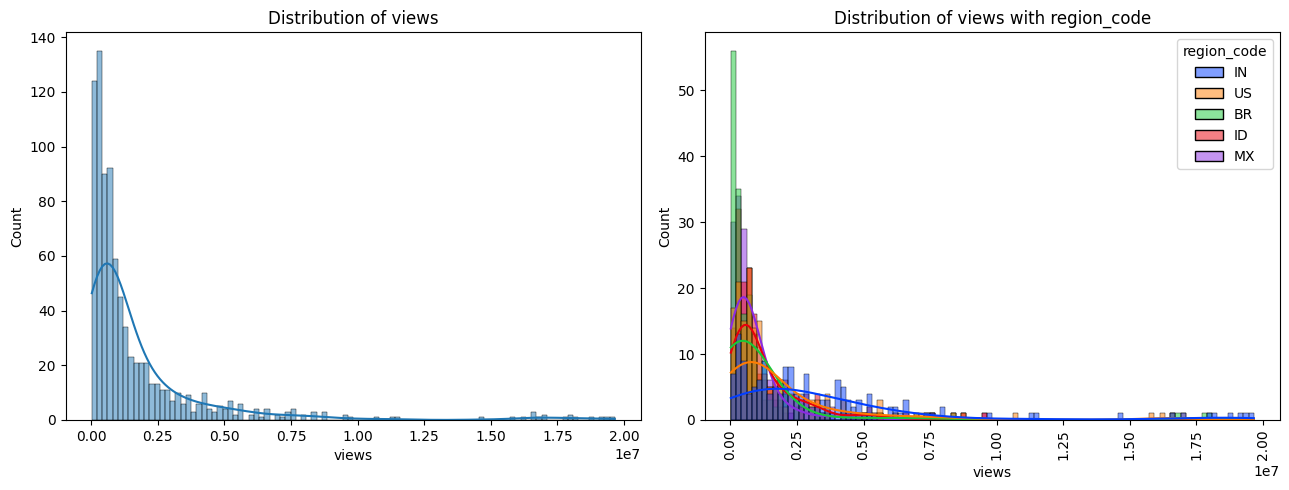

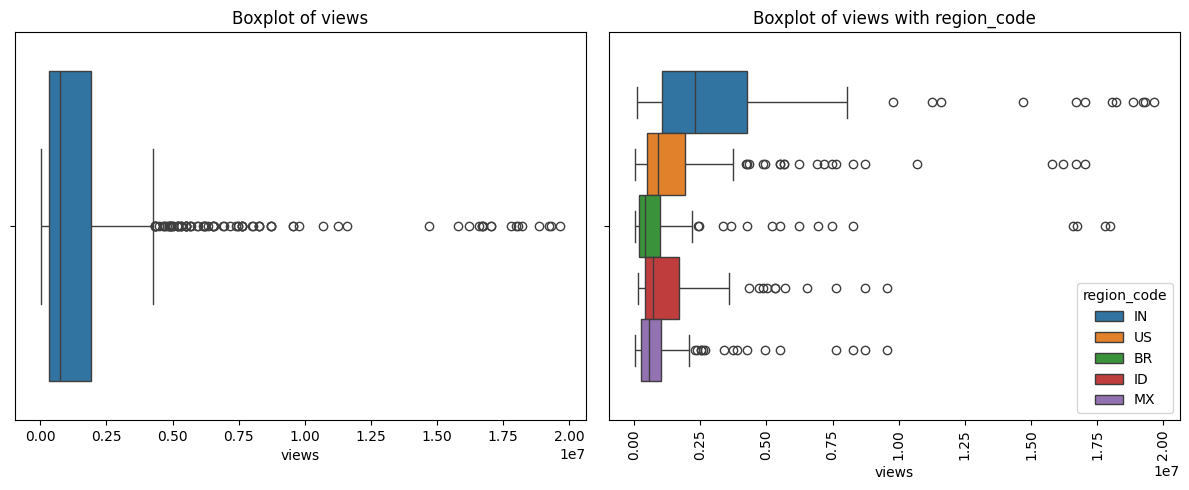

----------------------------------- 

likes


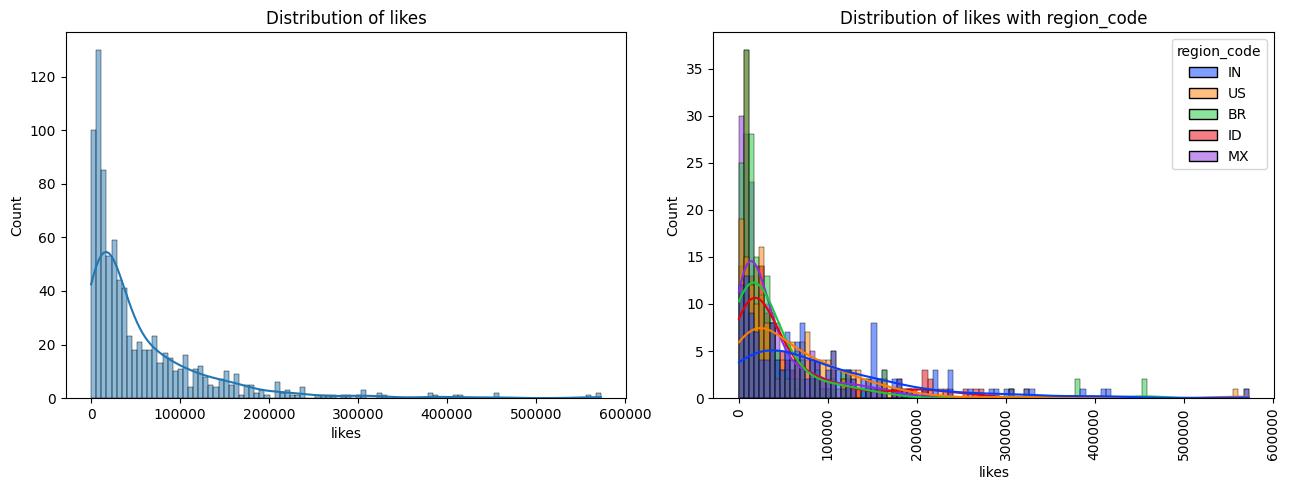

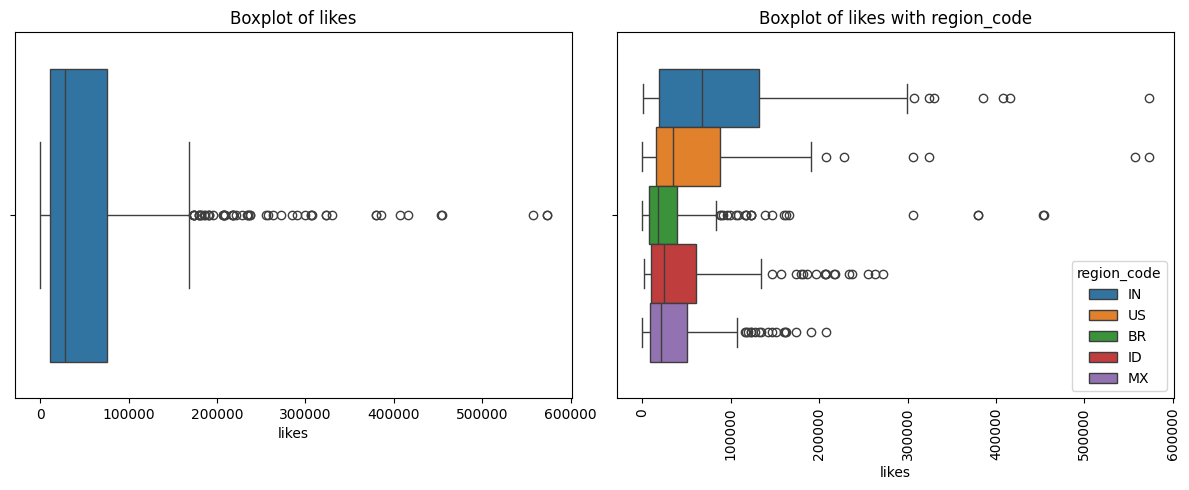

----------------------------------- 

comment_count


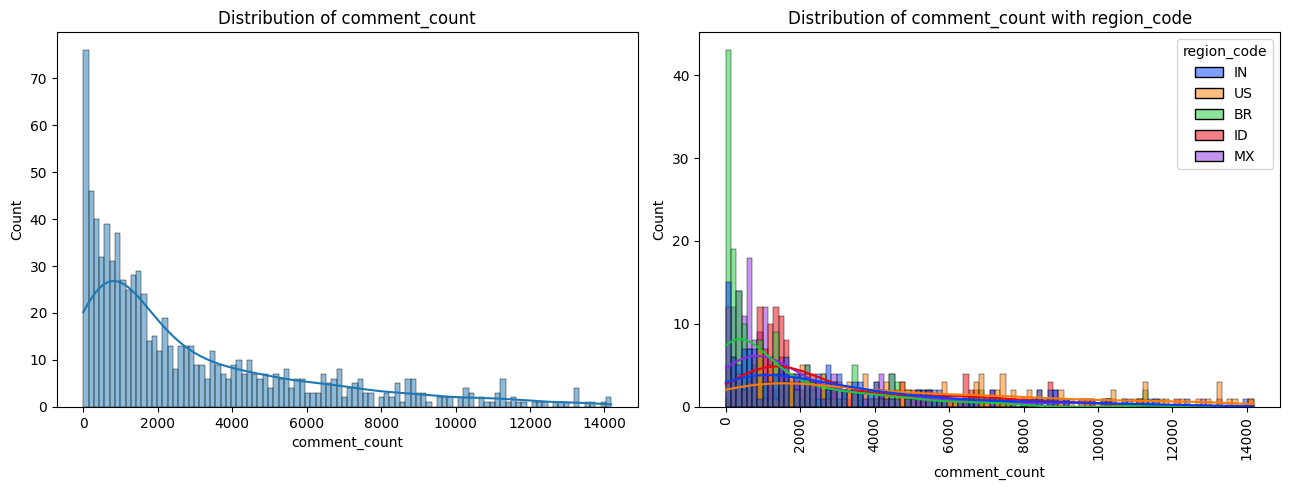

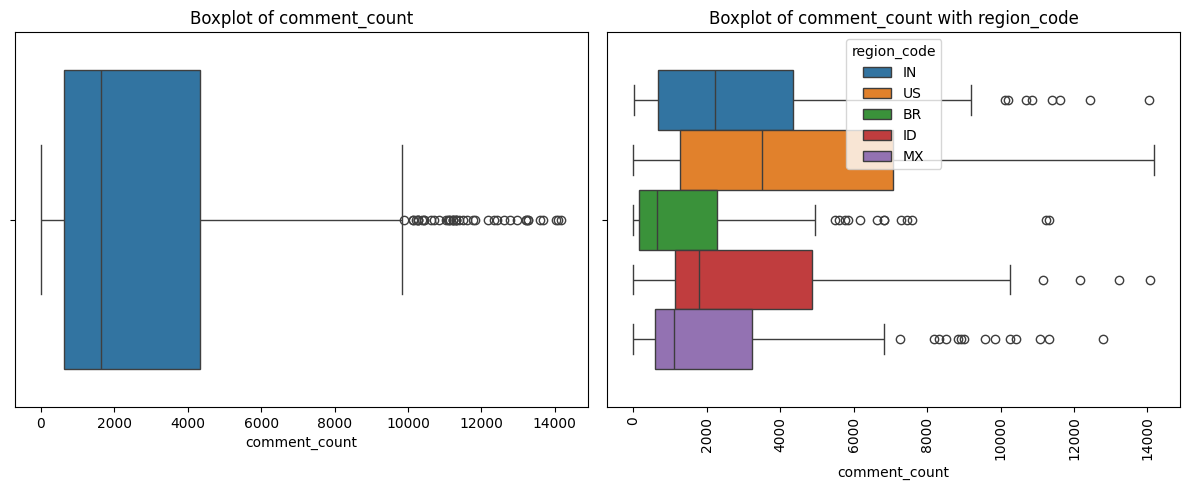

----------------------------------- 



In [145]:
for col in numerical:
    numerical_univariate(df_clean, col, 'region_code')

In [146]:
df_clean.describe()

,category_id,views,likes,comment_count,duration_in_min,views_per_minute,likes_per_minute,likes_per_view,comments_per_view
count,847.00,847.00,847.00,847.00,847.00,847.00,847.00,847.00,847.00
mean,18.69,"1,769,449.21","56,604.46","2,929.96",30.05,"458,859.57","13,644.09",0.05,0.00
std,5.92,"2,890,873.84","74,345.33","3,133.86",64.61,"1,660,625.62","42,012.43",0.04,0.01
min,1.00,"20,125.00",0.00,0.00,0.28,756.51,0.00,0.00,0.00
25%,17.00,"328,926.50","10,599.50",635.50,4.04,"20,644.64",617.72,0.02,0.00
50%,20.00,"758,873.00","28,436.00","1,645.00",11.80,"60,525.73","2,117.89",0.03,0.00
75%,24.00,"1,909,524.50","75,198.00","4,340.50",24.12,"218,230.99","9,288.38",0.06,0.00
max,28.00,"19,653,593.00","572,937.00","14,180.00",714.90,"17,631,717.02","533,188.57",0.38,0.05


### 2.2 Bivariate Analysis

In [147]:
for col in numerical:
    print(f'{col} has skew : {df[col].skew()}')

duration_in_min has skew : 5.130544883975713
views has skew : 4.280650479864312
likes has skew : 4.528863677159311
comment_count has skew : 4.422671338341118


since the graphs are extremely skewed to right, we will normalize them to identify patterns better in bivariate analysis

In [148]:
for col in numerical:
    df[col] = np.log1p(df[col])

#### 2.2.1 Numerical vs Numerical

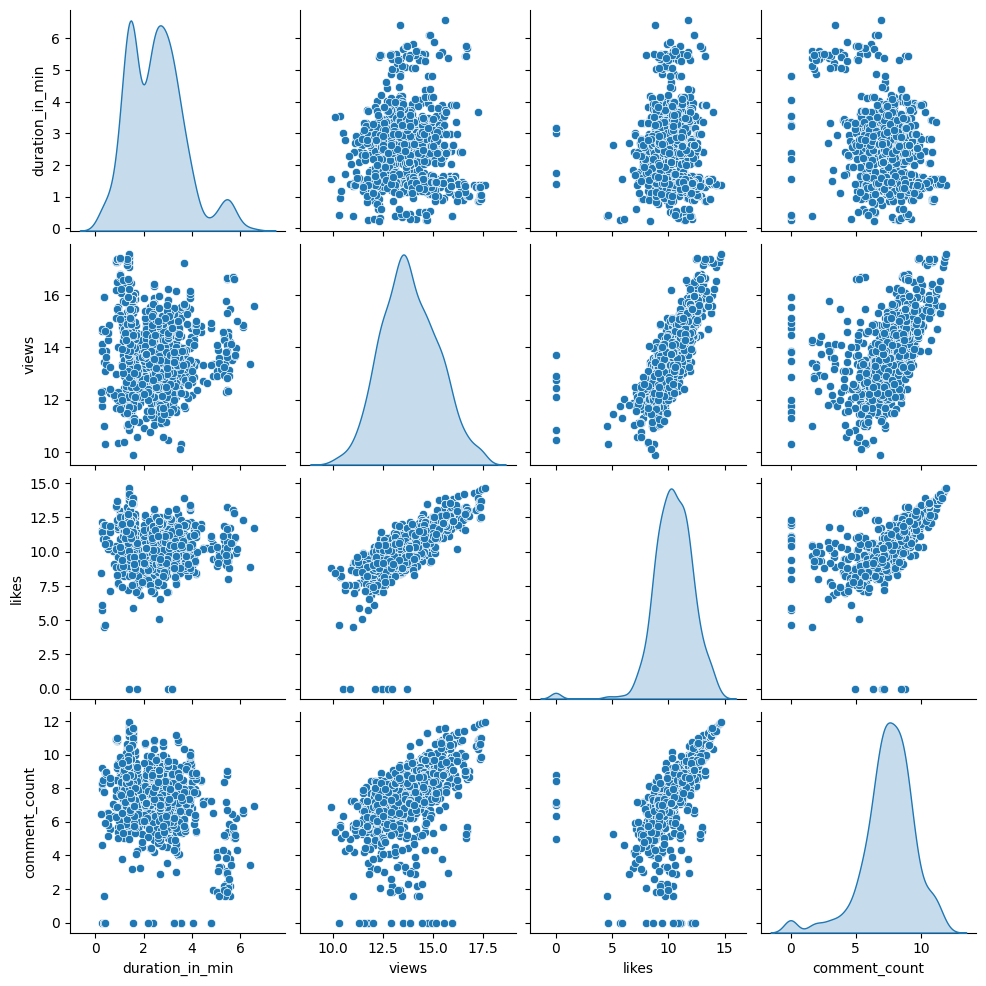

In [153]:
sns.pairplot(df[numerical], diag_kind='kde')
plt.show()

In [ ]:
cols = numerical.copy()
cols.append('region_code')
df1 = df[cols]

   duration_in_min  views  likes  comment_count region_code
0             1.01  16.63  12.69           8.81          IN
1             1.38  17.07  14.28          11.66          IN
2             1.59  14.54  11.34           8.59          IN
3             3.42  15.31  12.61          10.77          IN
4             2.55  14.13  11.00           8.17          IN


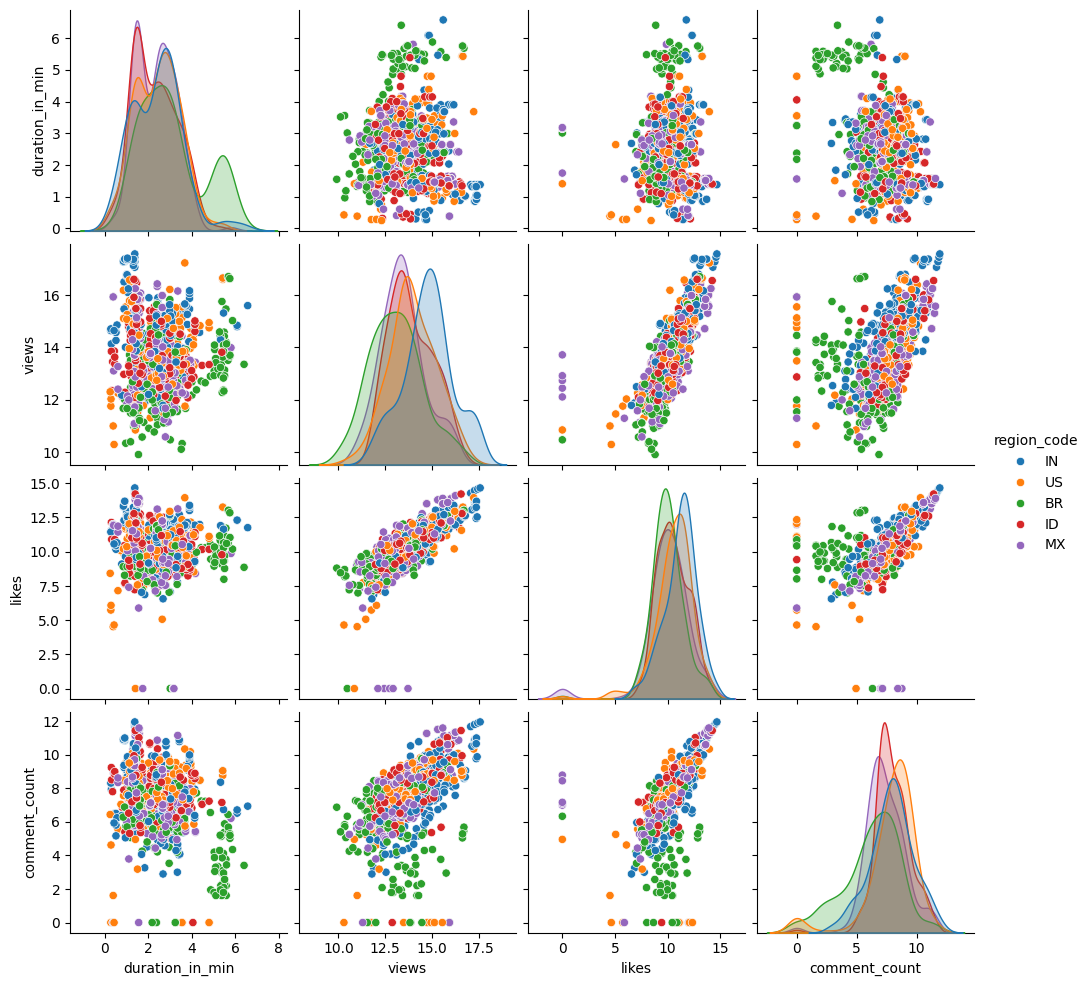

In [152]:
sns.pairplot(df1, diag_kind='kde', hue='region_code')
plt.show()

In [ ]:
df.head()

,id,region_code,publish_date_time,channel_id,channel_name,title,description,category_id,duration,caption,...,likes,comment_count,publish_date,publish_time,duration_in_min,views_per_minute,likes_per_minute,likes_per_view,comments_per_view,category
0,XhW3i2f54BQ,IN,2025-02-24 05:37:32+00:00,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,Watch #HIT3Teaser : Sarkaar's Laathi on Wall P...,1,PT1M45S,True,...,12.69,8.81,2025-02-24,05:37:32,1.01,"9,540,372.00","185,061.71",0.02,0.00,Film & Animation
1,W8x6Dwyj0-A,IN,2025-02-22 11:30:08+00:00,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,YOU CAN FEEL THE HEAT! PRESENTING THE OFFICIAL...,10,PT2M58S,False,...,14.28,11.66,2025-02-22,11:30:08,1.38,"8,680,405.05","534,898.32",0.06,0.00,Music
2,dbWfo4NAx8M,IN,2025-02-23 17:12:10+00:00,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not Disappointed at All | #PAKVIND | Shoa...,I am Not Disappointed at All | #PAKVIND\n\n#Sh...,17,PT3M53S,False,...,11.34,8.59,2025-02-23,17:12:10,1.59,"532,071.13","21,593.04",0.04,0.00,Sports
3,DQnZhK6Y27g,IN,2025-02-23 06:11:52+00:00,UCebC4x5l2-PQxg46Ucv9CsA,Crazy XYZ,Crazy Secret Room Making Challenges Part-3 | इ...,Probo Link: https://probo-in.onelink.me/1kre/C...,28,PT29M42S,False,...,12.61,10.77,2025-02-23,06:11:52,3.42,"149,583.40","10,123.03",0.07,0.01,Science & Technology
4,UTaWdNZkGcM,IN,2025-02-23 17:21:39+00:00,UC9D7QzaNDP11e4jI4ygU5Xg,NewsBook,IND vs PAK: India की Pakistan पर Virat जीत ! R...,#indvspak #viratkohli #shreyasiyer #shubmangil...,17,PT11M48S,False,...,11.00,8.17,2025-02-23,17:21:39,2.55,"116,461.61","5,052.29",0.04,0.00,Sports
